In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

from IPython.display import Image
PATH = "/Users/Song/Desktop/Tensorflow codes/Pictures/"

Instructions for updating:
non-resource variables are not supported in the long term


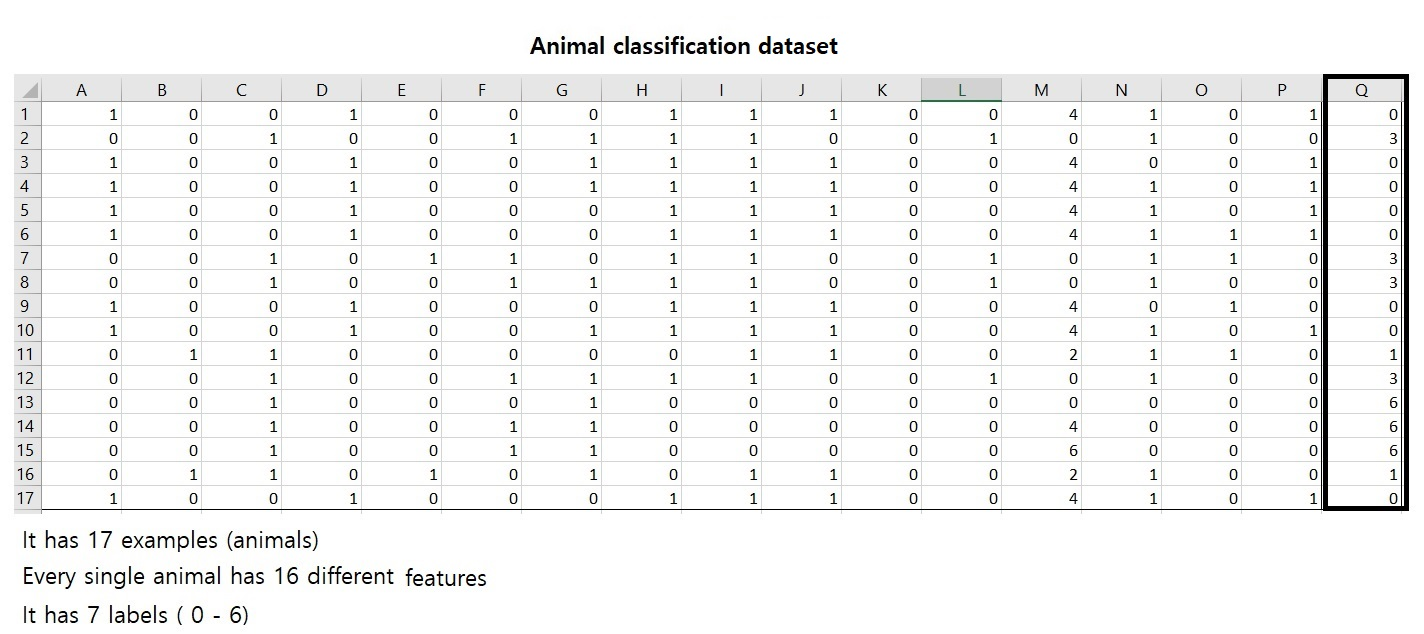

In [2]:
# animal classification: predict animal type based on their various features

Image(filename = PATH + "28.jpg")

In [3]:
# import dataset

xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [4]:
# make sure that the shape and data are OK

print(x_data.shape, x_data)
print(y_data.shape, y_data)

(17, 16) [[1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 1. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 4. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 4. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 4. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 2. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 6. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 1. 0. 1.]]
(17, 1) [[0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [6.]
 [6.]
 [6.]
 [1.]
 [0.]]


In [5]:
# placeholders for a tensor that are always fed

x = tf.placeholder(tf.float32, [None, 16])
y = tf.placeholder(tf.int32, [None, 1]) # 0 ~ 6: shape = (?, 1)

nb_classes = 7 # number of classes: 0 ~ 6

# one-hot encoding

y_one_hot = tf.one_hot(y, nb_classes) # one-hot shape = (?, 1, 7)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes]) # one-hot reshape = (?, 7)

In [6]:
# variables

𝜃_0 = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')
𝜃 = tf.Variable(tf.random_normal([16, nb_classes]), name = 'weight')

In [7]:
# tf.nn.softmax activates softmax classifier to get hypothesis

logits = tf.matmul(x, 𝜃) + 𝜃_0
hypothesis = tf.nn.softmax(logits)

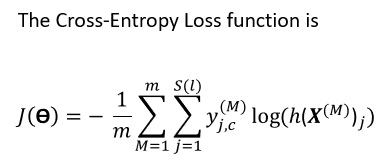

In [8]:
Image(filename = PATH + "26.jpg")

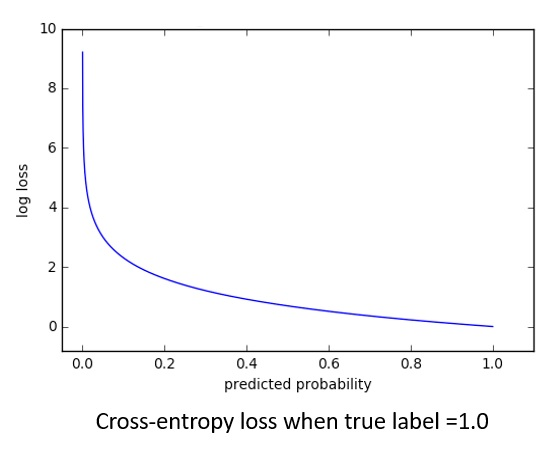

In [9]:
Image(filename = PATH + "27.jpg")

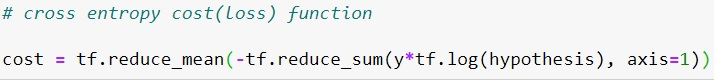

In [10]:
Image(filename = PATH + "29.jpg")

In [11]:
# cross entropy cost(loss) function can be defined as shown below as well:

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost = tf.reduce_mean(cost_i)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [12]:
# minimize the cost function

train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [13]:
# compute prediction 

prediction = tf.argmax(hypothesis, 1) # it gives the right label value (0 ~ 6) from the set of probabilites

# collect right predictions when 'prediction' equals y, 
# here y_one_hot is 'label' and tf.argmax(y_one_hot, 1) means 'y' before implementing the one-hot encoding for 'y'

collect_prediction = tf.equal(prediction, tf.argmax(y_one_hot, 1)) 

# compute accuracy 

accuracy = tf.reduce_mean(tf.cast(collect_prediction, tf.float32))

In [14]:
# lauch the graph in a session

with tf.Session() as sess:
    
    # Initialize tensorflow variables
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        
        cost_val, _ = sess.run([cost, train], feed_dict = {x: x_data, y: y_data})
        p, a = sess.run([prediction, accuracy], feed_dict={x: x_data, y: y_data})
        
        if step % 100 == 0:
            print(step, cost_val, p, a) 

0 12.230141 [3 4 3 3 3 3 4 4 3 3 3 4 4 3 3 3 3] 0.0
100 0.33788654 [0 3 0 0 0 0 3 3 0 0 1 3 3 6 6 1 0] 0.9411765
200 0.17241557 [0 3 0 0 0 0 3 3 0 0 1 3 1 6 6 1 0] 0.9411765
300 0.09407175 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
400 0.057532668 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
500 0.040074673 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
600 0.030498294 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
700 0.024563273 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
800 0.020548576 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
900 0.017658414 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
1000 0.015480436 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
1100 0.013780987 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
1200 0.012418257 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
1300 0.011301476 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
1400 0.010369489 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
1500 0.009580038 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
1600 0.008902681 [0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0] 1.0
1700 0.008315179 [0 3 0 0 0 0 3 3 0 